Excercise 2
--------------------------------------------------

In [76]:
import psycopg2
import wrds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

db=wrds.Connection(wrds_username='zimushko')
#db.create_pgpass_file()

Loading library list...
Done


In [77]:
##getting data from wrd
apple=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (7) " 
                "and date>='2010-01-01'" "and date<='2021-12-31'")
pg=db.raw_sql("select  date, ret " "from crsp.dsf " "where permco in (21446) " 
                "and date>='2010-01-01'" "and date<='2021-12-31'")

#rename the columns
apple=apple.rename(index=apple["date"], columns={"ret": "Apple"})
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})

#merge into one table
S=pd.merge(apple, pg, on='date')

S['date']=pd.to_datetime(S['date'], format='%Y-%m-%d')
S=S.set_index('date')

#resample
S=S+1
S=S.resample('W').prod() - 1

r_free=0.015

In [78]:
#a)

#Calculating expected return
Apple_expret = S['Apple'].mean()*52
pg_expret = S['PG'].mean()*52

#calculating std
Apple_std = S['Apple'].std()*np.sqrt(52)
pg_std = S['PG'].std()*np.sqrt(52)

#calculating correlation
corr=S['Apple'].corr(S['PG'])

#printing the results
print('Annualized expected return of Apple is', Apple_expret, 'and of PG is', pg_expret)
print('Annualized standard deviation of Apple is', Apple_std, 'and of PG is', pg_std)
print('Correlation between Apple and PG is', corr)

Annualized expected return of Apple is 0.31488799352464364 and of PG is 0.12494079949532126
Annualized standard deviation of Apple is 0.27885509761119703 and of PG is 0.15548409493148735
Correlation between Apple and PG is 0.3158716491676753


Text(0.5, 1.0, 'mean-standard deviation frontier')

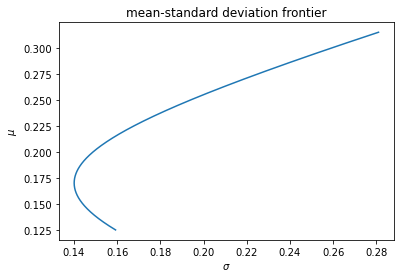

In [114]:
#b)

#computing mean and std of the portfolio
weight = np.linspace(0, 1.0, num=1000)
expreturn = weight*Apple_expret+(1-weight)*pg_expret
std = np.sqrt(weight**2*Apple_std**2+(1-weight)**2*pg_std**2+2*corr*Apple_std**2*pg_std**2)

#plot the frontier
plt.plot(std, expretuern)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.title('mean-standard deviation frontier')

In [120]:
# c)
#finding gmv portfolio
gmv = np.argmin(std)

#gmv potfolio
apple_weights = weight[gmv]
pg_weights = 1-apple_weights
gmv_retuern = expreturn[gmv]
gmv_std = std[gmv]
Sharp_r = (gmv_retuern-r_free)/gmv_std

print('Apple Weight:',apple_weights)
print('PG Weight:',pg_weights)
print('Global minimum variance portfolio expected return:', gmv_retuern)
print('Global minimum variance portfolio standard deviation:', gmv_std)
print('Sharp Ratio:', Sharp_r)

Apple Weight: 0.23723723723723725
PG Weight: 0.7627627627627628
Global minimum variance portfolio expected return: 0.17000334702780315
Global minimum variance portfolio standard deviation: 0.14010503148007344
Sharp Ratio: 1.1063367631436465


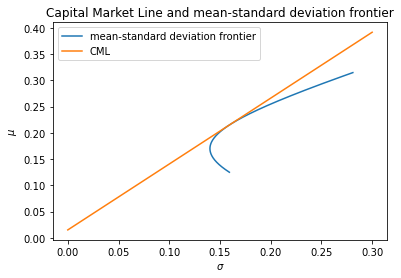

In [139]:
#d)
SRatio=(expreturn-r_free)/std
maxSR = np.max(SRatio)
x= np.linspace(0, 0.3, num=2)
CML=r_free+maxSR*x

plt.plot(std, expretuern, label= 'mean-standard deviation frontier')
plt.plot(x, CML, label='CML')
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.title('Capital Market Line and mean-standard deviation frontier')
plt.legend()